# Detection Malicious URL Using ML Models

A URL consists of the top-level domain, hostname, paths, and port of the web
address, as in the following diagram:

![url](https://user-images.githubusercontent.com/70811337/150021474-4ba64b34-1d09-427f-9cf6-25508571d18d.PNG)

## About Dataset
## Dataset Description
`The dataset contains information on 11,000+ websites with 30 parameters per website, plus a class label indicating whether the website is a Fake URL or not. The dataset is available in both .txt and .csv formats.`

0>>fake

1>>not fake

## Table of contents


1. [Importing Libraries](#1)
2. [Load Dataset](#2)
3. [Meta information of Dataframe](#3)
4. [Checking for NaN values](#4)
5. [Feature Extraction](#5)
6. [Train & Test Split](#6)
7. [Training models](#7)
      <ul>
          <li>✔️ Decision Tree Classifier</li>
          <li>✔️ KNeighborsClassifier</li>
          <li>✔️ LogisticRegression</li>
          <li>✔️ RandomForestClassifier</li>
          <li>✔️ XGBClassifier</li>
          <li>✔️ SGDClassifier</li>
          <li>✔️ SVC</li>
      </ul>

8. [Final Report](#8)



<a id="1"></a> <br>
# 📥 Importing Libraries

In [ ]:
print('hhhhhhhhhh')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
%matplotlib inline

<a id="2"></a> <br>
# 🗃️ Load Dataset

In [2]:
data = pd.read_csv('phishing.csv')
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


<a id="3"></a> <br>
# 📝 Meta information of Dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [4]:
data.shape

(11054, 32)

In [5]:
data=data.drop('Index',axis=1)

In [6]:
data

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11052,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [7]:
data.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,0.628551,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,0.777804,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="4"></a>
# 🔎 Checking for NaN values

In [8]:
data.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [9]:
data["LongURL"].value_counts()

LongURL
-1    8960
 1    1959
 0     135
Name: count, dtype: int64

In [10]:
data.duplicated().sum()

5205

In [11]:
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [12]:
data['class'].value_counts()

class
 1    6157
-1    4897
Name: count, dtype: int64

In [13]:
data["class"] = data["class"].replace(-1,0)
count = data['class'].value_counts()

In [14]:
data['class'].value_counts()

class
1    6157
0    4897
Name: count, dtype: int64

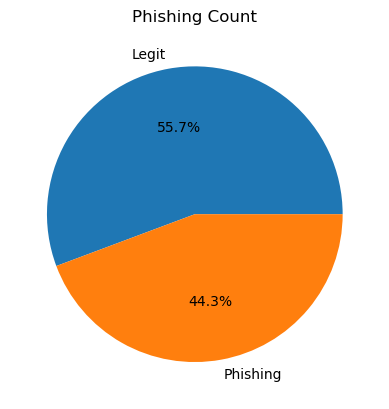

In [15]:
plt.pie(data['class'].value_counts(),labels=["Legit","Phishing"],autopct='%.1f%%')
plt.title("Phishing Count")
plt.show()

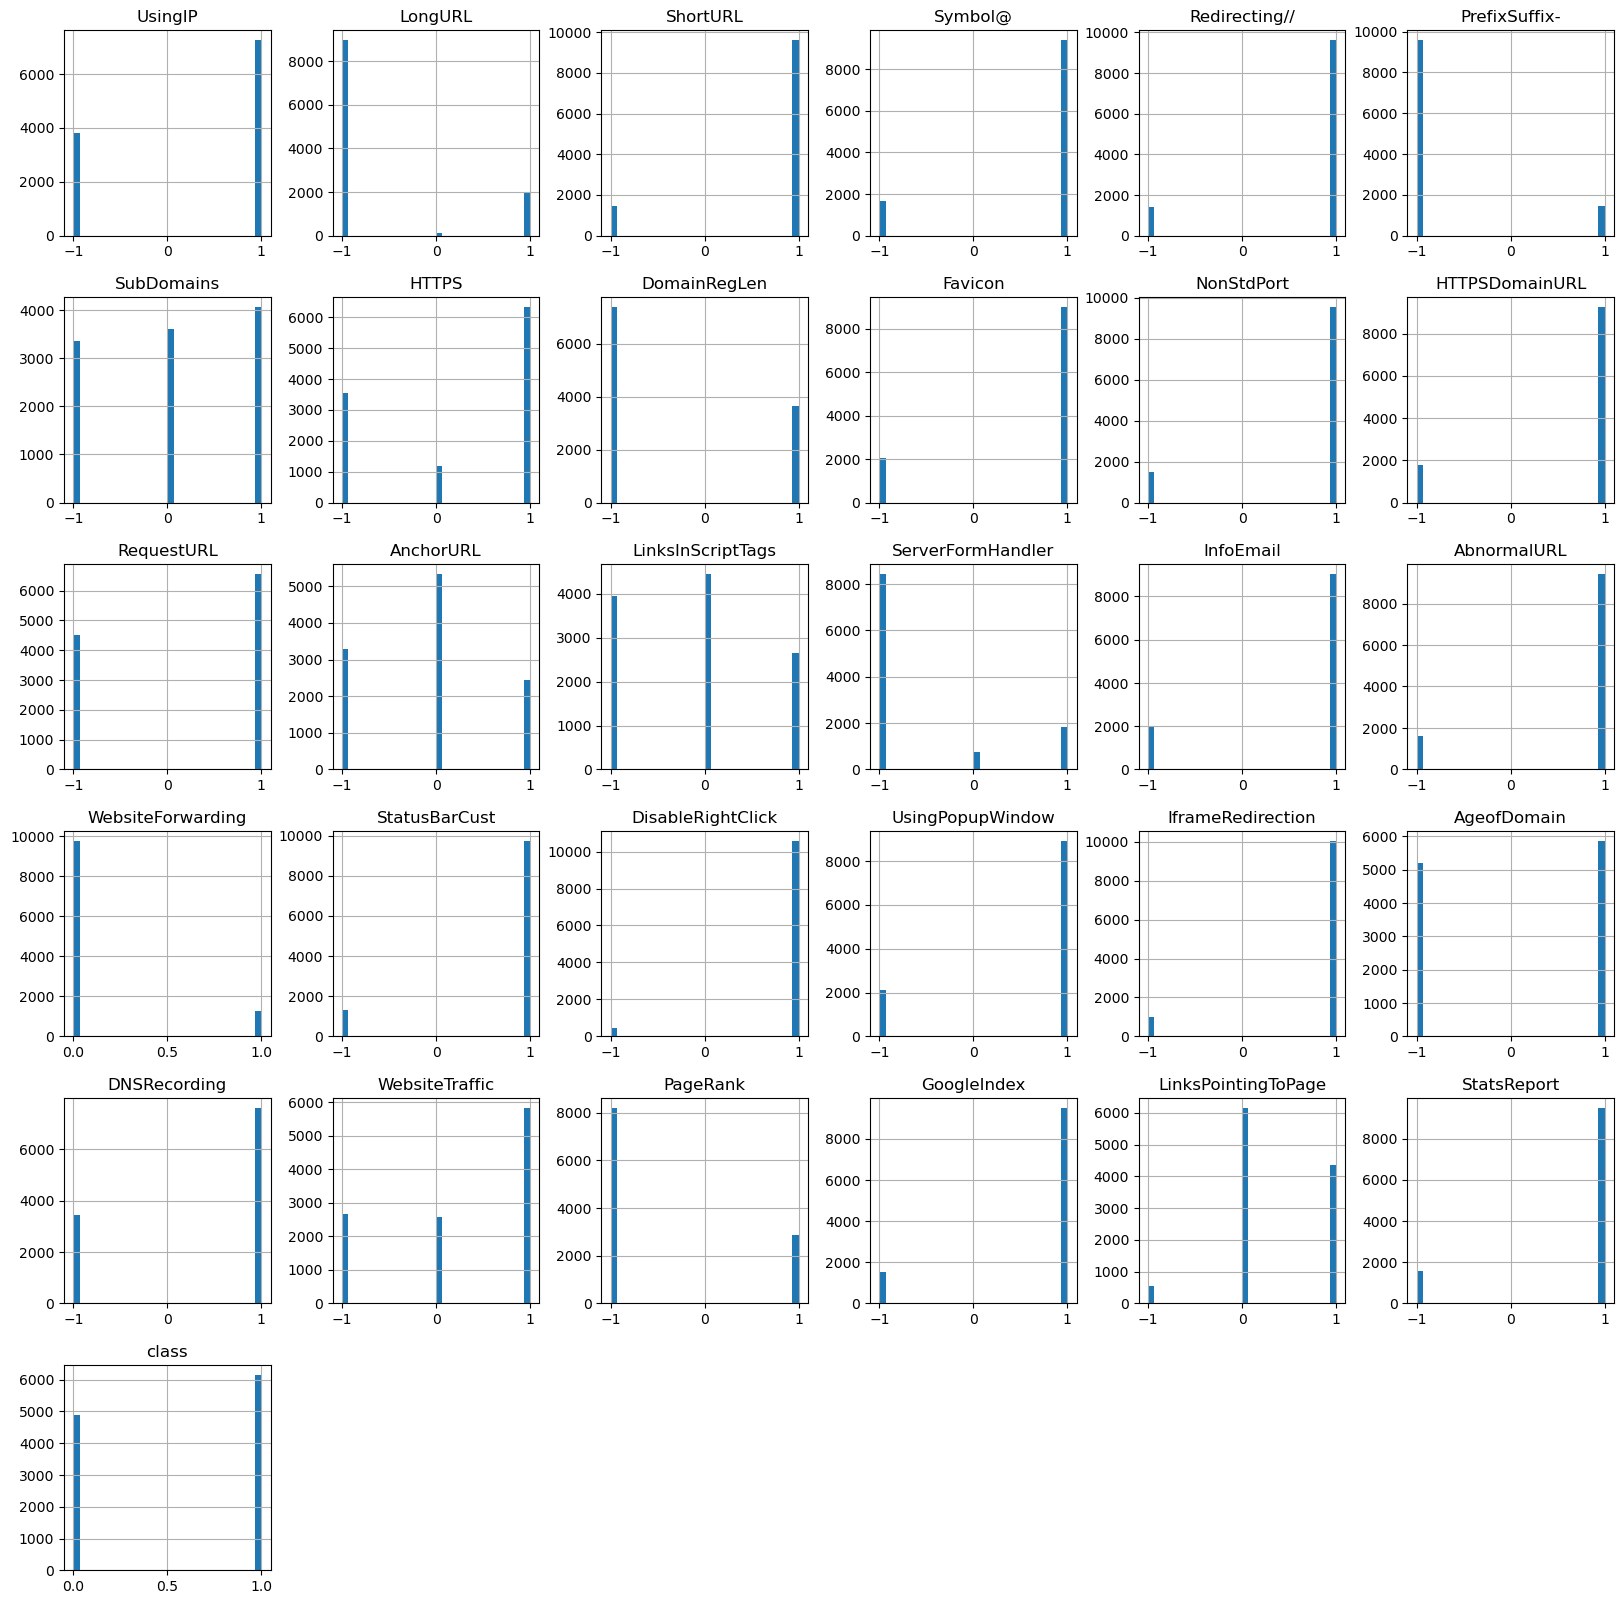

In [16]:
data.hist(figsize=(20, 20), bins=30)
plt.show()

<a id="5"></a> <br>
# 🦾 Feature Extraction

<Axes: >

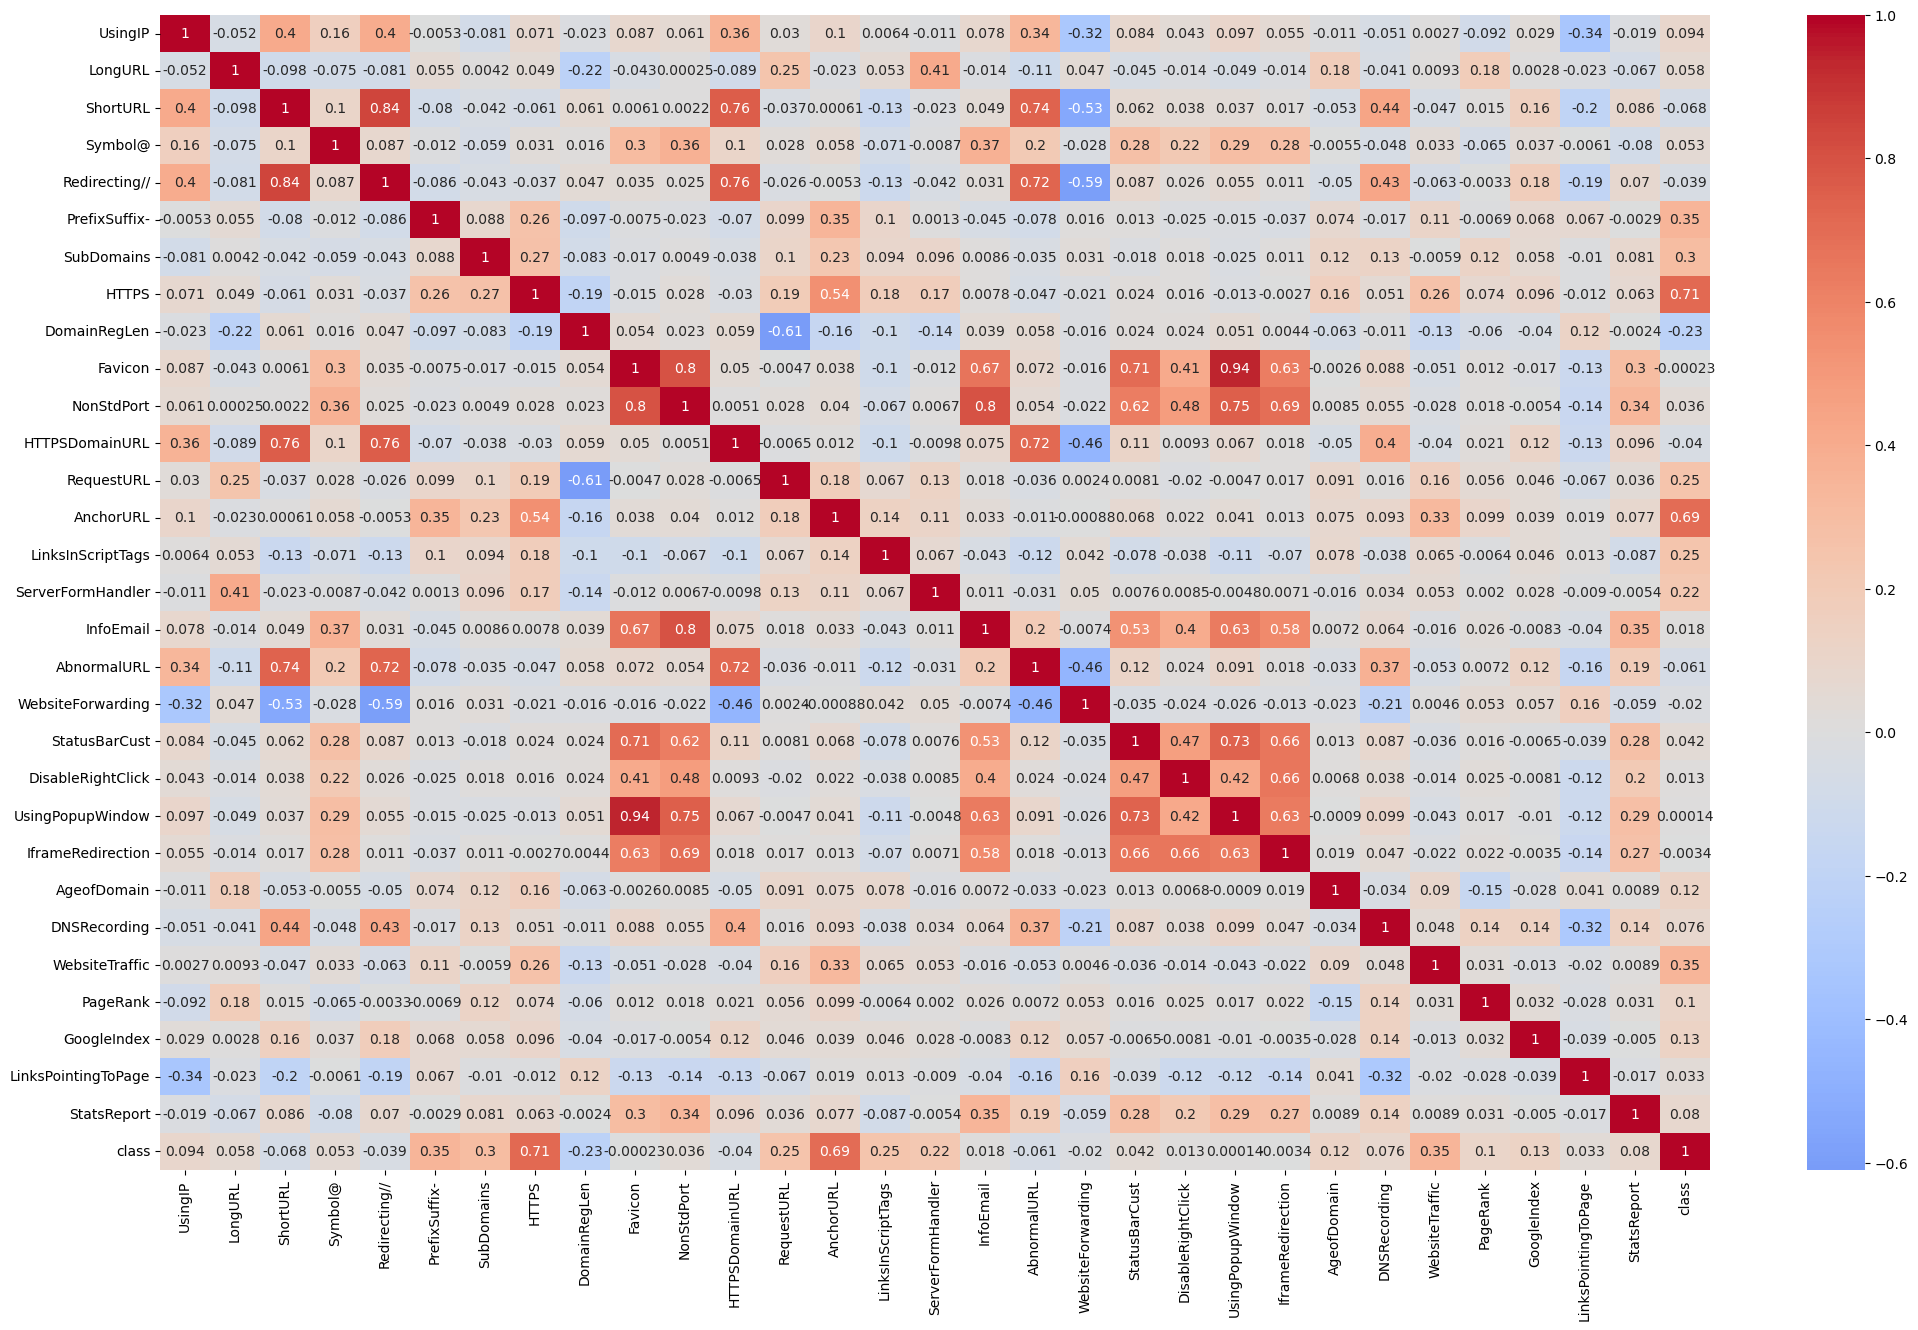

In [17]:
corr_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)


In [18]:
features = data.columns[0:-1]
target =  data.columns[-1]

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
# Get all feature names
all_features = X.columns

# Initialize SelectPercentile
selector = SelectPercentile(percentile=60, score_func=f_classif)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the p-values
p_values = selector.pvalues_

# Adjust the length of p_values to match all_features
if len(p_values) != len(all_features):
    feature_pvalues = pd.Series(p_values, index=all_features[:len(p_values)])
else:
    feature_pvalues = pd.Series(p_values, index=all_features)

# Get the indices of the selected features
selected_features_idx = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = all_features[selected_features_idx]
print("Selected Features:", selected_features)

# Print p-values of all features
print("\nP-Values of all features:\n", feature_pvalues)

Selected Features: Index(['UsingIP', 'LongURL', 'ShortURL', 'PrefixSuffix-', 'SubDomains',
       'HTTPS', 'DomainRegLen', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'AbnormalURL', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'StatsReport'],
      dtype='object')

P-Values of all features:
 UsingIP                 3.511128e-18
LongURL                 1.121013e-06
ShortURL                5.080260e-10
Symbol@                 5.793158e-06
Redirecting//           2.041584e-04
PrefixSuffix-          8.646427e-221
SubDomains             3.568288e-157
HTTPS                   0.000000e+00
DomainRegLen            2.151858e-96
Favicon                 8.159439e-01
NonStdPort              1.689793e-03
HTTPSDomainURL          2.515564e-04
RequestURL             1.620665e-123
AnchorURL               0.000000e+00
LinksInScriptTags      2.300457e-115
ServerFormHandler       5.450166e-90
InfoEmail               1.428867e-01
Abnormal

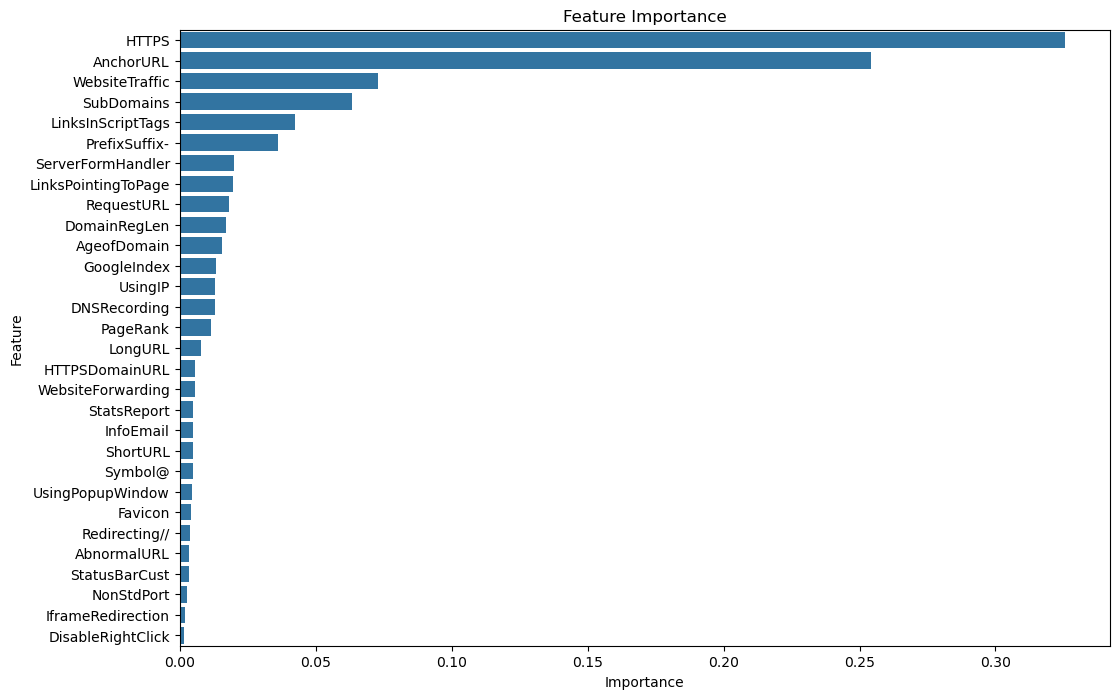

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'Feature': np.array(all_features)[indices], 'Importance': importances[indices]})
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



<a id="6"></a> <br>
# ✂️ Train & Test Split

In [21]:
features = selected_features
X = data[features]
y = data[target]

# Split the data into training and testing sets
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=2)


In [22]:
X

,UsingIP,LongURL,ShortURL,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,AbnormalURL,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,StatsReport
0,1,1,1,-1,0,1,-1,1,0,-1,-1,1,-1,-1,0,-1,1,1
1,1,0,1,-1,-1,-1,-1,1,0,-1,-1,-1,1,-1,1,-1,1,-1
2,1,0,1,-1,-1,-1,1,-1,0,0,-1,1,-1,-1,1,-1,1,1
3,1,0,-1,-1,1,1,-1,1,0,0,-1,1,-1,-1,0,-1,1,1
4,-1,0,-1,-1,1,1,-1,1,0,0,-1,-1,1,1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,1,1,1,-1,1,1,1,-1,1,1,1,-1,-1,1,1
11050,-1,1,1,-1,1,-1,-1,1,-1,-1,0,-1,1,1,1,1,1,1
11051,1,-1,1,-1,1,-1,-1,1,0,-1,-1,1,1,1,1,-1,1,1
11052,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,1,1,1,1,-1,1,1


In [23]:
X.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'PrefixSuffix-', 'SubDomains',
       'HTTPS', 'DomainRegLen', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'AbnormalURL', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'StatsReport'],
      dtype='object')

In [24]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 18)
(3317, 18)
(7737,)
(3317,)


<a id="7"></a> <br>
# <img src="https://cdn-icons-png.flaticon.com/32/4149/4149680.png"/> Training models

## Classifieres

## LogisticRegression()
- **Type**: Linear model
- **Use Case**: Binary classification, though it can be extended to multiclass problems.
- **Characteristics**: 
  - Predicts the probability of a binary outcome.
  - Uses a logistic function to model a binary dependent variable.
  - Assumes a linear relationship between the input features and the log-odds of the outcome.

## DecisionTreeClassifier()
- **Type**: Tree-based model
- **Use Case**: Both classification and regression tasks.
- **Characteristics**: 
  - Splits the data into subsets based on feature values.
  - Creates a tree-like model of decisions.
  - Easy to interpret and visualize.
  - Prone to overfitting, especially with deep trees.

## RandomForestClassifier()
- **Type**: Ensemble model (Bagging)
- **Use Case**: Both classification and regression tasks.
- **Characteristics**: 
  - Consists of multiple decision trees (usually trained with the "bagging" method).
  - Reduces overfitting compared to a single decision tree.
  - Improves accuracy by averaging multiple trees.
  - Handles large datasets and high-dimensional data well.

## SVC (Support Vector Classifier)
- **Type**: Linear and Non-linear model (depending on kernel used)
- **Use Case**: Both binary and multiclass classification.
- **Characteristics**: 
  - Finds a hyperplane that best divides the data into classes.
  - Can use different kernels (linear, polynomial, RBF) to handle non-linear boundaries.
  - Effective in high-dimensional spaces.
  - Requires careful tuning of parameters and is computationally intensive for large datasets.

## XGBClassifier (Extreme Gradient Boosting)
- **Type**: Ensemble model (Boosting)
- **Use Case**: Both classification and regression tasks.
- **Characteristics**: 
  - Utilizes gradient boosting framework.
  - Combines the predictions of several base learners (weak models) to improve performance.
  - Highly efficient and scalable, often wins machine learning competitions.
  - Requires careful tuning of hyperparameters.

## KNeighborsClassifier(n_neighbors=3)
- **Type**: Instance-based (Lazy learning)
- **Use Case**: Both classification and regression tasks.
- **Characteristics**: 
  - Classifies data points based on the 'k' nearest neighbors.
  - Non-parametric, meaning it makes no assumptions about the underlying data distribution.
  - Simple and intuitive but can be slow with large datasets.
  - Performance depends heavily on the choice of 'k' and the distance metric used.


In [25]:
from ModelHandller import Model

LogisticRegression
TrainAcc: 0.9243892981775882
TestAcc: 0.9192041000904432
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1458
           1       0.91      0.95      0.93      1859

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



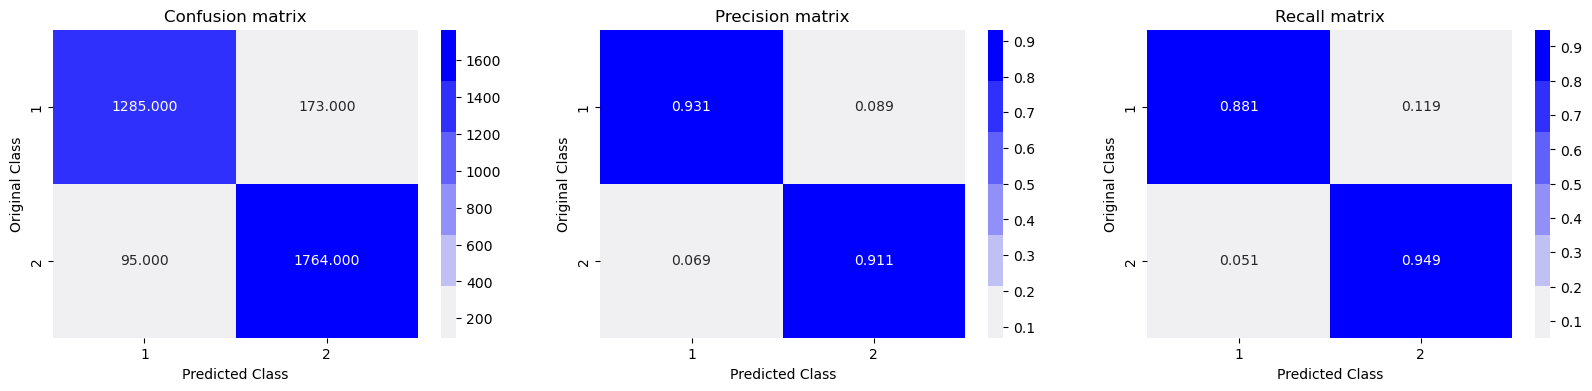

DecisionTreeClassifier
TrainAcc: 0.9838438671319633
TestAcc: 0.9620138679529695
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.97      0.97      0.97      1859

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



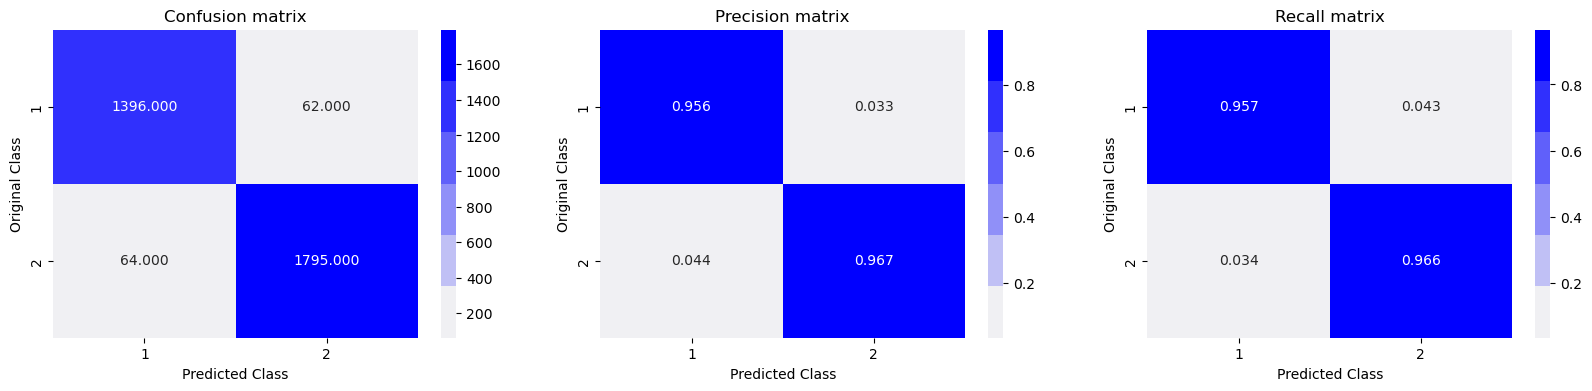

RandomForestClassifier
TrainAcc: 0.9838438671319633
TestAcc: 0.9716611395839614
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1458
           1       0.97      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



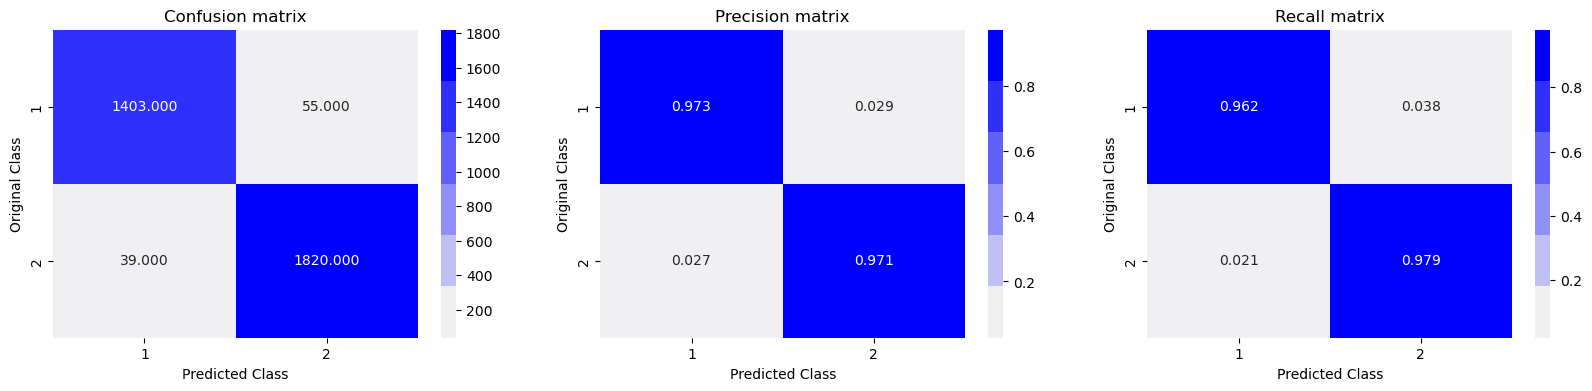

SVC
TrainAcc: 0.9464908879410624
TestAcc: 0.9451311425987338
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1458
           1       0.94      0.97      0.95      1859

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.95      0.95      0.94      3317



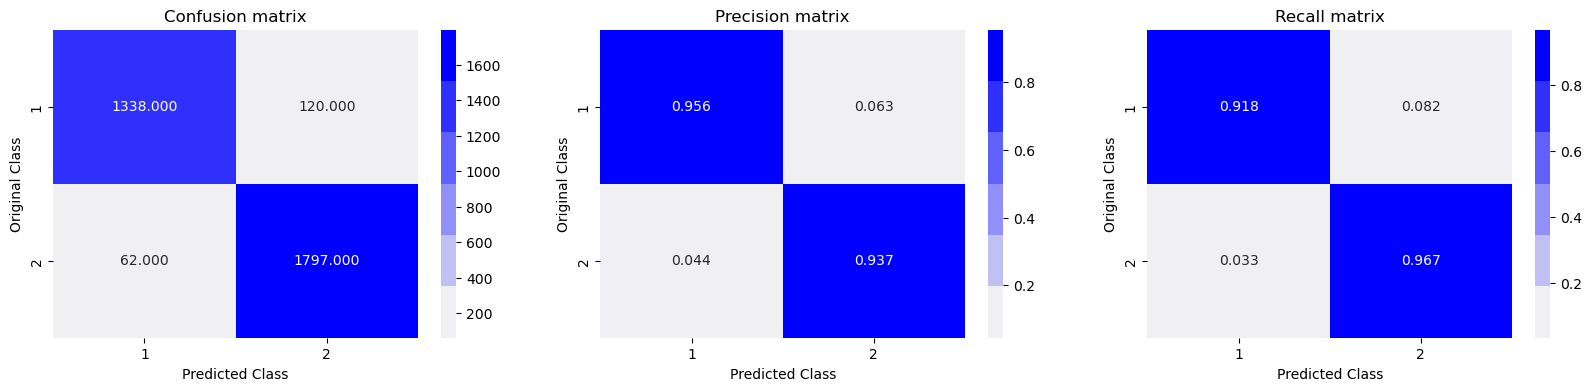

XGBClassifier
TrainAcc: 0.9791909008659687
TestAcc: 0.968947844437745
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1458
           1       0.97      0.98      0.97      1859

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



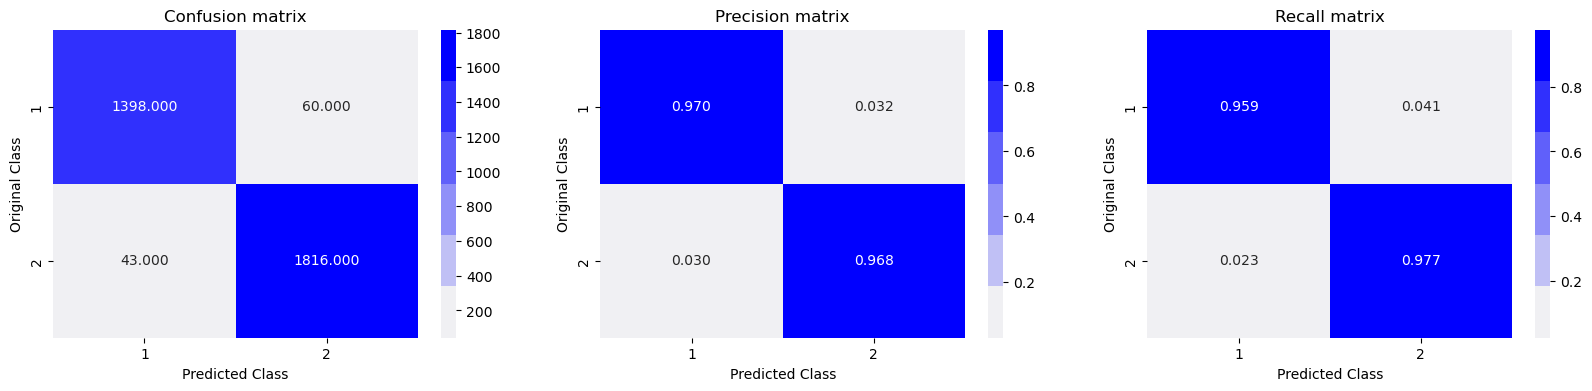

EnsembleModel
TrainAcc: 0.9479126276334496
TestAcc: 0.9460355743141393
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1458
           1       0.94      0.97      0.95      1859

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.94      3317
weighted avg       0.95      0.95      0.95      3317



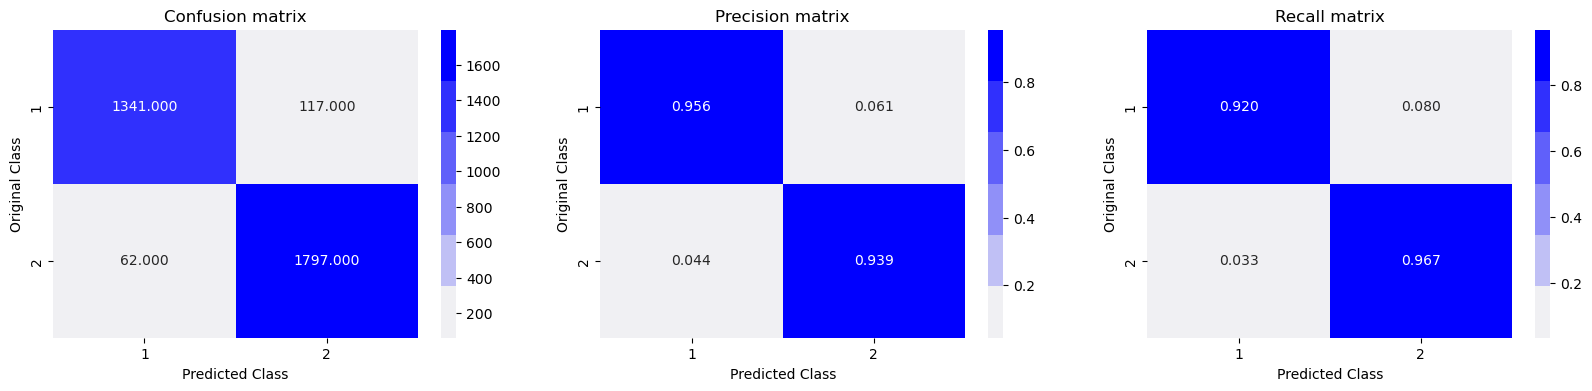

In [26]:
clfs = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),XGBClassifier()]
dic,predictors = Model(clfs, train_X,train_Y,test_X,test_Y)

In [27]:
ModelResults = pd.DataFrame(dic)

In [28]:
ModelResults.sort_values(ascending=False,by=['TrainAcc',"TestAcc"])

,Model,TrainAcc,TestAcc
2,RandomForestClassifier,0.983844,0.971661
1,DecisionTreeClassifier,0.983844,0.962014
4,XGBClassifier,0.979191,0.968948
5,EnsembleModel,0.947913,0.946036
3,SVC,0.946491,0.945131
0,LogisticRegression,0.924389,0.919204


In [29]:
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [30]:
from ModelHandller import MakeInfrence

In [31]:
url = "https://google.com" #real 1
MakeInfrence(predictors,url)

>>>>>>>real site==[1]


In [32]:
url = "https://alienadobe-faa5a.web.app/" #fake 0
MakeInfrence(predictors,url)

Error retrieving WHOIS info: 'NoneType' object has no attribute 'lower'
>>>fake site==[0]


In [33]:
url = "https://facebook.com" #real 1
MakeInfrence(predictors,url)

>>>>>>>real site==[1]


In [34]:
url = "http://assist-whatsapp.com/" #fake 0
MakeInfrence(predictors,url)

>>>fake site==[0]


In [35]:
url = "https://eastlink-108440.weeblysite.com/	" #fake 0
MakeInfrence(predictors,url)

>>>fake site==[0]


In [44]:
url = "https://kaggle.com/" #real 1
MakeInfrence(predictors,url)

>>>fake site==[0]


In [42]:
url = "https://linkedin.com/" #real 1
MakeInfrence(predictors,url)

>>>>>>>real site==[1]


In [43]:
url = "https://tiktok.com/" #real 1
MakeInfrence(predictors,url)

>>>>>>>real site==[1]


In [47]:
url = "https://www.apple.com/" #real 1
MakeInfrence(predictors,url)

>>>>>>>real site==[1]


In [49]:
url = "http://apple.bookzell.com/	" #fake
MakeInfrence(predictors,url)

>>>fake site==[0]
